In [1]:
import time,glob,logging,threading,csv,json
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from functions import fig_format


In [2]:
def load_data(filename):
    with open("data/" + filename) as f:
        meta = json.load(f)

    with open(meta['Data'], 'rb') as file:
        Data = np.load(file,allow_pickle=True)

    return Data

In [3]:
Data = load_data("2021-06-14/3_5NsRun/metadata.json")

In [4]:
for x in Data['WGM_mode']:
    print(x)

yPos
lambda
matrix


In [5]:
for x in Data['Out']:
    print(x)

lambda
flux


No handles with labels found to put in legend.


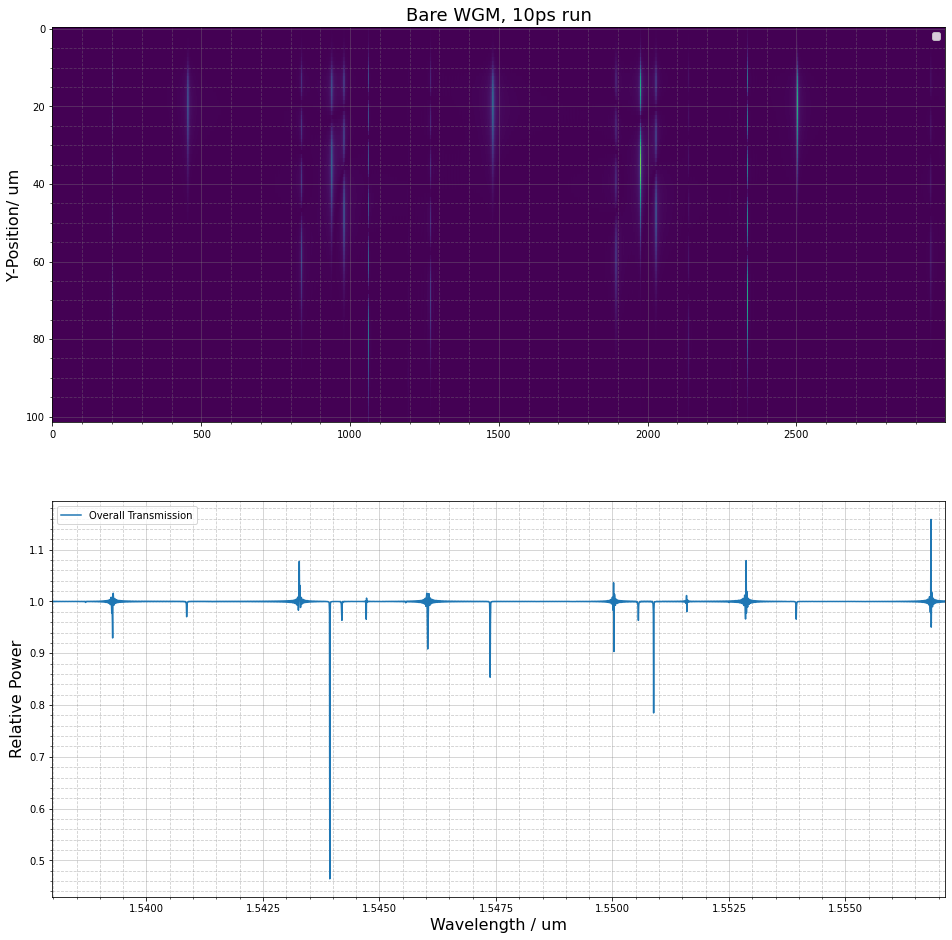

In [6]:
fig,axes = plt.subplots(2,1,figsize=(16,16))

minWL = min(Data['WGM_mode']['lambda'])
maxWL = max(Data['WGM_mode']['lambda'])
minY = min(Data['WGM_mode']['yPos'])
maxY = max(Data['WGM_mode']['yPos'])

pos = axes[0].imshow(np.fliplr(np.flipud(np.absolute(Data['WGM_mode']['matrix']))), interpolation='nearest', aspect='auto')#,extent=(minWL, maxWL,minY,maxY),vmin=0, vmax=50)


Tran = Data['Out']['flux']/Data['Src']['flux']
wl = Data['Out']['lambda']

axes[1].plot(wl,Tran,label='Overall Transmission')

axes[1].set_xlim(minWL,maxWL)

fig_format(axes[0],'Bare WGM, 10ps run','','Y-Position/ um','')

fig_format(axes[1],'','Wavelength / um','Relative Power','')

#plt.savefig("Meep1nsRun.pdf")